


# Part I - (Ford go bike data exploration)
## by (Iniobong Nwa)

## Introduction
> This dataset contains information about individual rides made in a bike sharing company in San Framcisco.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import datetime as dt


%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#read the csv file
fordbikes = pd.read_csv('fordgobike-tripdata.csv')


In [3]:
fordbikes.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
fordbikes.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
fordbikes.shape

(183412, 16)

In [6]:
fordbikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [7]:
df_bike = fordbikes.copy()

## Data Cleaning

## Issue 1: Missing values in start_station_id, start_station_name,  end_station_id, end_station_name, member_birth_year, member_gender


### Define: Drop rows with missinhn values

In [8]:
# view the null values
df_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

#### Code

In [9]:
#drop null values
df_bike.dropna(inplace= True)

#### Test

In [10]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


### Issue 2: Wrong data type for start_time and end_time.

### Define: Convert  start time and end time to datetime

#### Code

In [11]:
#convert to datetime data type
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])

#### Test

In [12]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

### Issue 3: Wrong data type for bike_id, start_station_id and end_station_id

#### Define: Convert bike id, start_station_id and end_station_id column to string data type

#### Code

In [13]:
#convert to object data type
df_bike['bike_id'] = df_bike['bike_id'].astype(str)
df_bike['bike_id'] = df_bike['start_station_id'].astype(str)
df_bike['bike_id'] = df_bike['end_station_id'].astype(str)

#### Test

In [14]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(7), int64(1), object(6)
memory u

## Issue: Wrong data type for user_type, bike_share_for_all_trip and member_gender

### Define: Convert user_type, bike_share_for_all_trip and member_gender to categorical data

#### Code

In [15]:
#convert to categorical data
df_bike['user_type'] = df_bike['user_type'].astype('category')
df_bike['bike_share_for_all_trip'] = df_bike['bike_share_for_all_trip'].astype('category')
df_bike['member_gender'] = df_bike['member_gender'].astype('category')

#### Test

In [16]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
dtypes: category(3), datetime64[ns](2), float64(7), int64(1),

In [17]:
df_bike['duration_min'] =df_bike['duration_sec']/60
df_bike['duration_min'] =df_bike['duration_min'].astype(int)

### What is the structure of your dataset?

> After cleaning the dataset, I have 174952 bike rides and 16 features.

### What is/are the main feature(s) of interest in your dataset?

> I would like to find out what type of user is more frequent and the duration of most trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To do this, I would be working with the duration_sec, user_type and bike_share_for_all_trip.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [18]:
#split the columns into hour, day and month datetime columns
df_bike['start_hour'] = df_bike['start_time'].dt.hour
df_bike['start_day'] = df_bike['start_time'].dt.day_name()
df_bike['start_month'] = df_bike['start_time'].dt.month_name()
#split the end time columns into hour, day and month
df_bike['end_hour'] = df_bike['end_time'].dt.hour
df_bike['end_day'] = df_bike['end_time'].dt.day_name()
df_bike['end_month'] = df_bike['end_time'].dt.month_name()

In [19]:
print(df_bike.shape)
df_bike.head()

(174952, 23)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_hour,start_day,start_month,end_hour,end_day,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,869,17,Thursday,February,8,Friday,March
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,1030,12,Thursday,February,5,Friday,March
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,608,17,Thursday,February,4,Friday,March
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,26,23,Thursday,February,0,Friday,March
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959.0,Male,No,29,23,Thursday,February,0,Friday,March


In [20]:
#save as csv file
df_bike.to_csv('df_bike.csv')
df = pd.read_csv('df_bike.csv')

In [21]:
df_bike['start_day'].value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_day, dtype: int64

In [22]:
df_bike['start_month'].value_counts()

February    174952
Name: start_month, dtype: int64

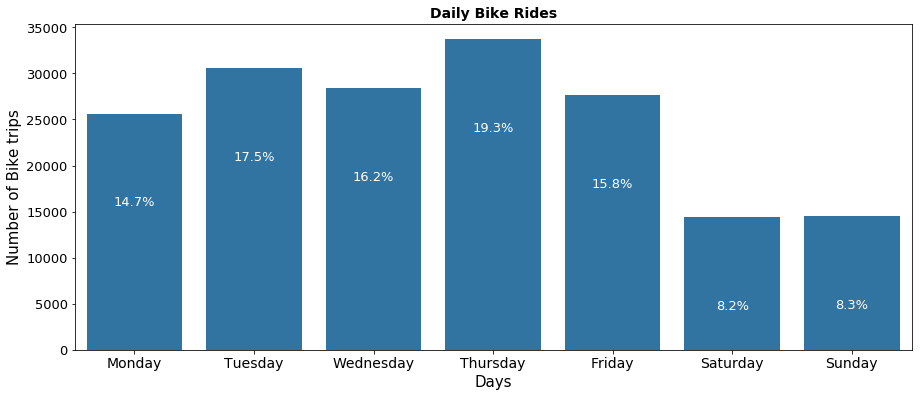

In [23]:
#bike rides for each day in the week
base_color = sb.color_palette()[0]
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday', 'Sunday']
plt.figure(figsize =[15,6])
sb.countplot(data= df_bike , x='start_day' , color= base_color, order= days_order)
plt.title('Bike ride most popular days', fontsize = 16, fontweight='bold')
plt.ylabel('Number of Bike trips', fontsize = 15)
plt.xlabel('Bike Ride start days', fontsize= 15)
plt.title('Daily Bike Rides', fontsize=14, fontweight='bold')
plt.xlabel('Days');
days_count = df_bike['start_day'].value_counts()
total_trips= days_count.sum()
plt.yticks(size=13); 
locs, labels = plt.xticks( size=14); 
for loc, label in zip(locs, labels):
    count = days_count[label.get_text()]
    string = '{:0.1f}%'.format(100*count/total_trips)
    plt.text(loc, count-10000, string, ha = 'center', color = 'white',fontsize = 13)

From the plot, its obvious that the most rides are recorded on Thursday. In general, there are more daily rides on week days and fewer rides on the weekends.

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64


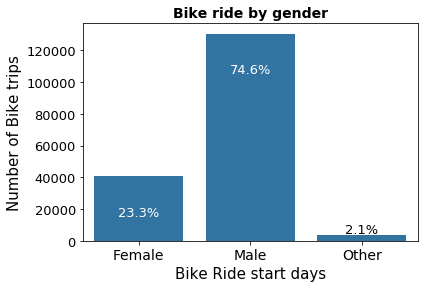

In [24]:
#bike rides for each gender group
print(df_bike['member_gender'].value_counts())

sb.countplot(data= df_bike , x='member_gender' , color= base_color)

gender_count = df_bike['member_gender'].value_counts()
total_gender= gender_count.sum()
plt.yticks(size=13);
plt.ylabel('Number of Bike trips', fontsize = 15)
plt.xlabel('Bike Ride start days', fontsize= 15)
plt.title('Bike ride by gender', fontsize=14, fontweight='bold')
locs, labels = plt.xticks( size=14)
for loc, label in zip(locs, labels):
    count = gender_count[label.get_text()]
    if count < 40000:
        pct_string = '{:0.1f}%'.format(100*count/total_gender)
        plt.text(loc, count+1000, pct_string, ha = 'center', color = 'black',fontsize = 13)

    else:
        pct_string = '{:0.1f}%'.format(100*count/total_gender)
        plt.text(loc, count-25000, pct_string, ha = 'center', color = 'white',fontsize = 13)

We have a higher percentage of male riders than female riders.

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64


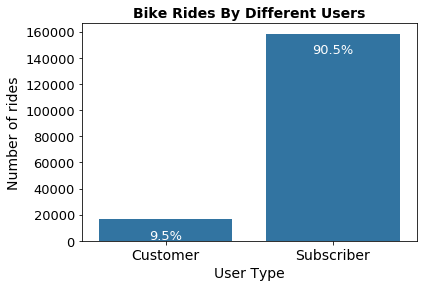

In [25]:
#bike sharing for users type
print(df_bike['user_type'].value_counts())
sb.countplot(data= df_bike , x='user_type' , color= base_color)

usertype_count = df_bike['user_type'].value_counts()
users= usertype_count.sum()
plt.yticks(size=13)
plt.title('Bike Rides By Different Users', fontsize=14, fontweight='bold')
plt.ylabel('Number of rides', fontsize=14)
plt.xlabel('User Type', fontsize=14)
locs, labels = plt.xticks( size=14); 
for loc, label in zip(locs, labels):
    count = usertype_count[label.get_text()]
    string = '{:0.1f}%'.format(100*count/users)
    plt.text(loc, count-15000, string, ha = 'center', color = 'white',fontsize = 13)
plt.show()

Most of the users are subscribers and they make up over 90% of the total users.

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64


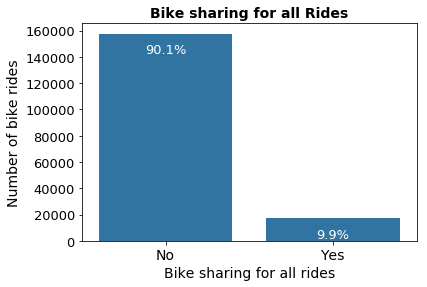

In [26]:
# no of rides for bike sharing
print(df_bike['bike_share_for_all_trip'].value_counts())
sb.countplot(data= df_bike, x='bike_share_for_all_trip', color= base_color)

bike_sharing_count = df_bike['bike_share_for_all_trip'].value_counts()
bike_sharing= bike_sharing_count.sum()
plt.yticks(size=13)
plt.title('Bike sharing for all Rides', fontsize=14, fontweight='bold')
plt.xlabel('Bike sharing for all rides', fontsize=14)
plt.ylabel('Number of bike rides', fontsize=14)
locs, labels = plt.xticks( size=14); 
for loc, label in zip(locs, labels):
    count = bike_sharing_count[label.get_text()]
    string = '{:0.1f}%'.format(100*count/bike_sharing)
    plt.text(loc, count-15000, string, ha = 'center', color = 'white',fontsize = 13)
    


90% of the trips are not bike sharing.

Text(0,0.5,'Number of Rides')

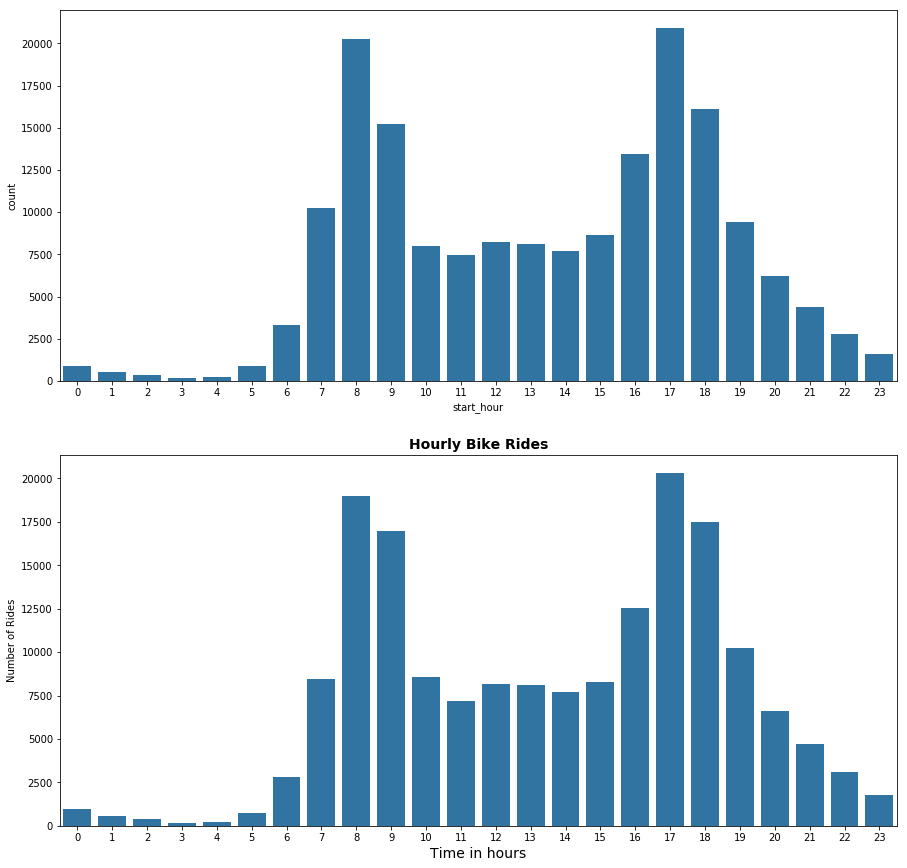

In [27]:
#hourly rides for all trips
fig, ax = plt.subplots(2,figsize = [15,15])

base_color = sb.color_palette()[0]
sb.countplot(data= df_bike, x = 'start_hour',color =base_color, ax = ax[0])
sb.countplot(data= df_bike, x = 'end_hour', color= base_color, ax =ax[1])
plt.title('Hourly Bike Rides', fontsize=14, fontweight='bold')
plt.xlabel('Time in hours', fontsize=14)
plt.ylabel('Number of Rides')

Only about 9% of our riders are into bike sharing while over 90% do not.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I split the start_time and end_time columns into, hour, day and month.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had to add some more columns to enhance our time based analysis.
> I had to change the data types of some columns.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

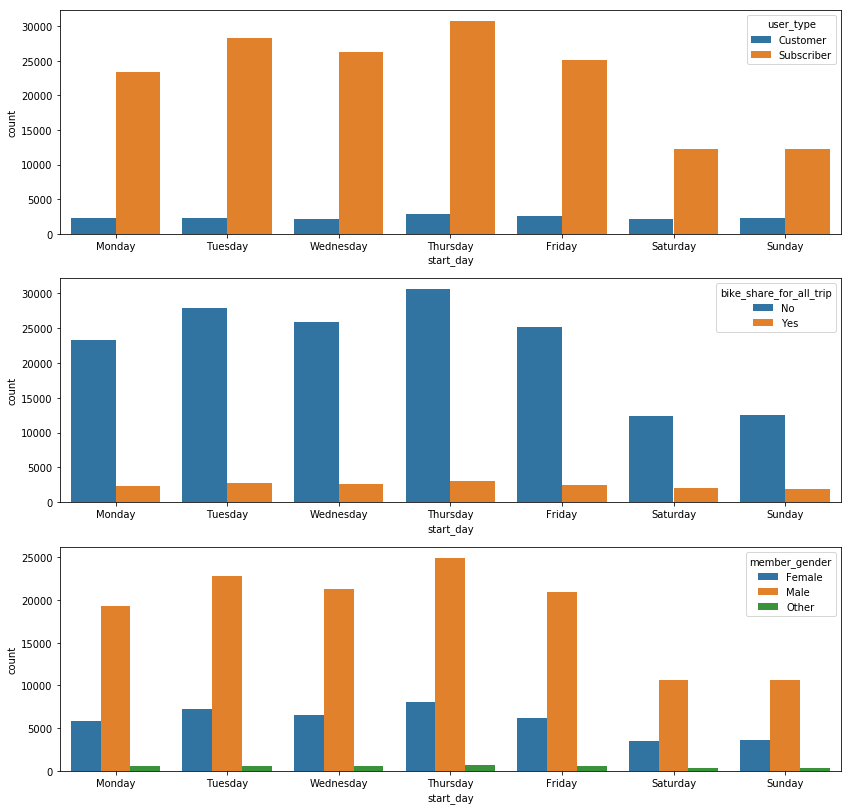

In [28]:
fig, ax = plt.subplots(3,figsize = [14,14])
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday', 'Sunday']
sb.countplot(data= df_bike, x = 'start_day', hue = 'user_type',order= days_order,ax=ax[0])
sb.countplot(data= df_bike, x = 'start_day', hue = 'bike_share_for_all_trip', order= days_order,ax=ax[1])
sb.countplot(data= df_bike, x = 'start_day', hue = 'member_gender', order= days_order, ax=ax[2])

From the plot above we have more subscribers than customers. We also have very few people bike sharing and we are more males involved than females.

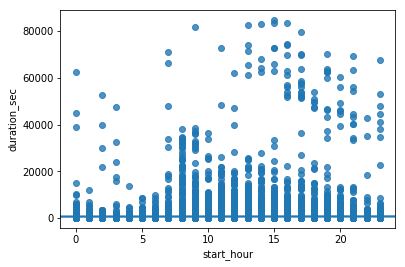

In [29]:
sb.regplot(data = df_bike, x='start_hour', y= 'duration_sec')

In [30]:
days_count = df_bike.groupby(['start_day', 'user_type']).size()
memgen_count = df_bike.groupby(['start_day', 'member_gender']).size()
share_count = df_bike.groupby(['start_day', 'bike_share_for_all_trip']).size()

In [31]:
days_count = days_count.reset_index(name= 'count')
memgen_count = memgen_count.reset_index(name= 'count')
share_count = share_count.reset_index(name= 'count')

In [32]:
days_count

,start_day,user_type,count
0,Friday,Customer,2541
1,Friday,Subscriber,25122
2,Monday,Customer,2309
3,Monday,Subscriber,23332
4,Saturday,Customer,2171
5,Saturday,Subscriber,12243
6,Sunday,Customer,2299
7,Sunday,Subscriber,12213
8,Thursday,Customer,2868
9,Thursday,Subscriber,30844


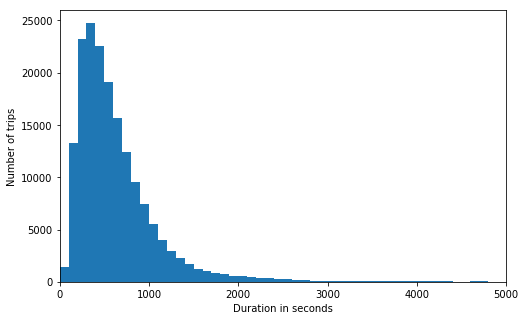

In [33]:
binsize = 100
bin_edges = np.arange(0, df_bike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_bike, x = 'duration_sec', bins = bin_edges)
plt.xlabel('Duration in seconds')
plt.ylabel('Number of trips')
plt.xlim(0,5000) # set up a limit due to the outliers
plt.show()

The above distribution is right skewed.

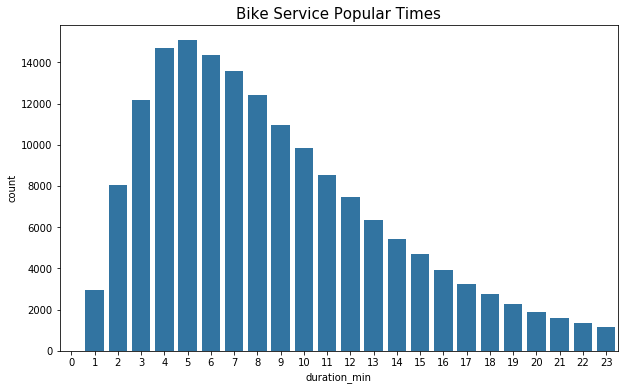

In [34]:
hour_order = np.arange(0,24)

plt.figure(figsize=(10,6))
plt.title('Bike Service Popular Times', fontsize=15)
ax = sb.countplot(data=df_bike, x='duration_min',order=hour_order, color=base_color)



This plot is equally right skewed

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observe we have more subscribers taking longer trips than customers and there are more males taking longer trips than females and other gender groups.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most users who go long distances do not bike share.

## Multivariate Exploration


Text(0,0.5,'Average Trip Duration (Secs)')

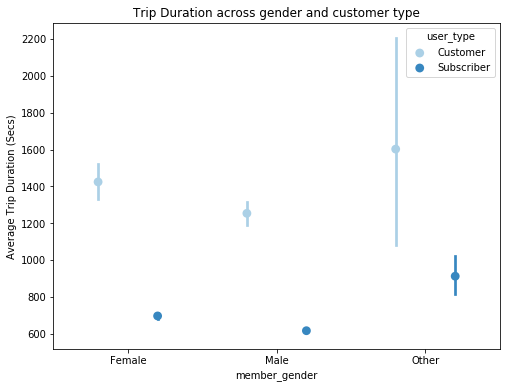

In [35]:
# plot for trip duration across gender and customer type
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_bike, x ='member_gender', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and customer type')
plt.ylabel('Average Trip Duration (Secs)')

From the plot above,I observe that customers take longer trips than subscribers and the other gender groups take longer trips than the frmale and the male gender.

[]

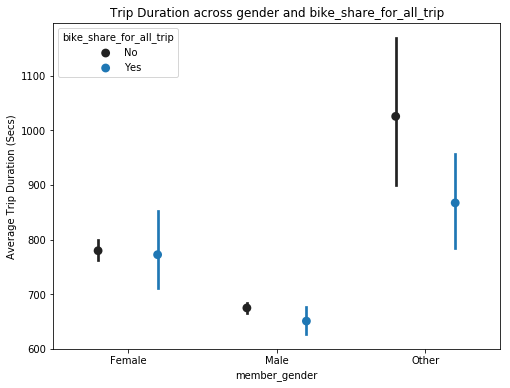

In [36]:
# plot for trip duration across gender and bike sharing for all trips
fig = plt.figure(figsize = [8,6])
base_color = sb.color_palette()[0]
ax = sb.pointplot(data = df_bike, x ='member_gender', y = 'duration_sec', hue = 'bike_share_for_all_trip', 
            color= base_color, linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and bike_share_for_all_trip')
plt.ylabel('Average Trip Duration (Secs)')
ax.set_yticklabels([],minor = True)

The other gender group have the longest trip on the average for bike sharing.

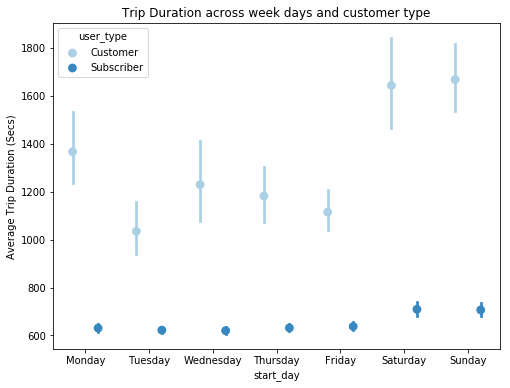

In [37]:
# plot for trip duration across customer type and week days
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_bike, x ='start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', order= days_order, dodge = 0.4)
plt.title('Trip Duration across week days and customer type')
plt.ylabel('Average Trip Duration (Secs)')
ax.set_yticklabels([],minor = True)
plt.show();

Customers have relatively higher trips than subscribers. Customers recorded higher trip duration on weekends and Subsribers have higher trip duration on weekends too. 

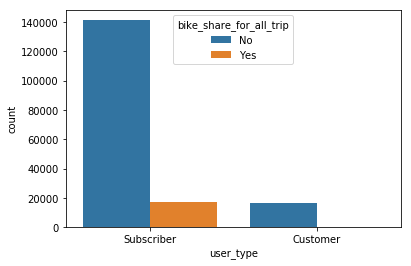

In [38]:
# plot for duration of trips for bike sharing by users and 
sb.countplot(data = df_bike, x = 'user_type', hue = 'bike_share_for_all_trip', order=df_bike.user_type.value_counts().index)

Only subscribers are bike sharing for all trips, customers don't bike share.

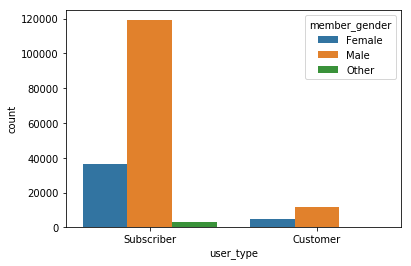

In [39]:
sb.countplot(data = df_bike, x = 'user_type', hue = 'member_gender', order=df_bike.user_type.value_counts().index)

Subscribers have other gender groups but customer only contained female and male.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The longest trips are taken on the weekends and by other gender group. To come to this conclusion, the features I explored were the member_gender and duration_sec features.

### Were there any interesting or surprising interactions between features?

> I discovered that we not only had males and females but other gender groups were also recorded as subscribers. The Customers do not bike share.
I also discoveree that the trips with the longest durations were taken by people with the bike sharing options and they had the longest trips everyday of the week, with the weekends having the longest trips.
While the most trips were recorded during the weekdays, with Thursday having the most number of trips.

## Conclusions
> Customers travel the same duration regardles of the day of the week, and only subscribers share bike on the trip. Over 90% of the trips were by subscribers while 90% of the trips were not bike sharing. We have the most trips on weekdays and fewer number of trips on weekend, while we have the longest trips on the weekends. During the weekdays, we have the most number of rides on Thurdays and the the least on Saturdays and Sundays. We have the most number of trips between 8am-9am and 4pm -5pm.